In [1]:
from pathlib import Path

import pandas as pd
import albumentations
from albumentations.pytorch import transforms

from ml.vision.utils import plot_batches
from ml.vision.data import ImageDataModule

In [2]:
df = pd.read_csv("../data/train_folds.csv")
df['fpath'] = "../data/train/" + df.Id + ".jpg"
df.head()

Id  Subject Focus  Eyes  Face  Near  Action  \
0  3f81a62dc5f2dc7e2aefc0fdecea471e              0     1     1     1       0   
1  24398e01afd20d5b197b31bc6f995505              0     0     1     1       0   
2  0a5640593c5e003a0b9c1cda9845deb7              0     0     1     1       0   
3  b69f616d2ae9a5529d65eaf266590b70              0     1     1     1       0   
4  45419a4a7f3d9ccdfdf9f2a5bf5813a7              0     1     1     1       0   

   Accessory  Group  Collage  Human  Occlusion  Info  Blur  Pawpularity  \
0          0      0        0      1          1     0     0           31   
1          0      0        0      0          0     0     0           58   
2          0      0        0      0          0     0     1           14   
3          0      0        0      0          0     0     0           28   
4          0      0        0      0          0     0     0           75   

   kfold                                              fpath  
0      3  ../data/train/3f81a62dc5f2dc7e2aefc0fdecea471e...  
1      2  ../data/train/24398e01afd20d5b197b31bc6f995505...  
2      1  ../data/train/0a5640593c5e003a0b9c1cda9845deb7...  
3      0  ../data/train/b69f616d2ae9a5529d65eaf266590b70...  
4      0  ../data/train/45419a4a7f3d9ccdfdf9f2a5bf5813a7...

In [3]:
train_image_fpaths = df.fpath.values.tolist()
train_image_fpaths[:5]

['../data/train/3f81a62dc5f2dc7e2aefc0fdecea471e.jpg',
 '../data/train/24398e01afd20d5b197b31bc6f995505.jpg',
 '../data/train/0a5640593c5e003a0b9c1cda9845deb7.jpg',
 '../data/train/b69f616d2ae9a5529d65eaf266590b70.jpg',
 '../data/train/45419a4a7f3d9ccdfdf9f2a5bf5813a7.jpg']

In [4]:
train_augmentation = albumentations.Compose(
    [
        albumentations.Resize(height=256, width=256),
        transforms.ToTensorV2(),
    ]
)

In [5]:
dm = ImageDataModule(
    task="classification",
    batch_size=32,
    train_image_paths=train_image_fpaths,
    train_targets=df.Pawpularity.values,
    train_augmentations=train_augmentation,
)
dm.setup()

In [6]:
dl = dm.train_dataloader()

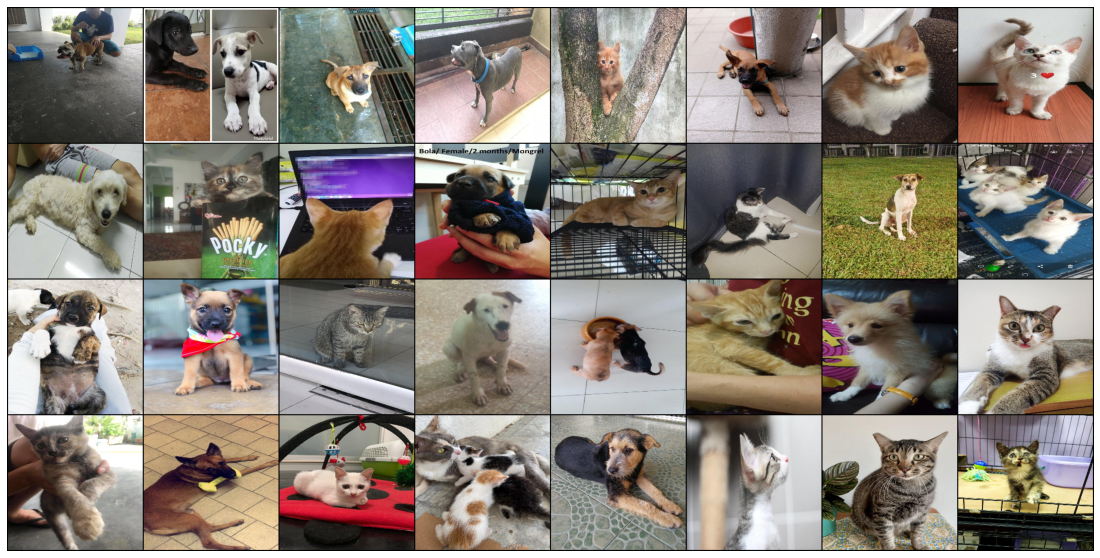

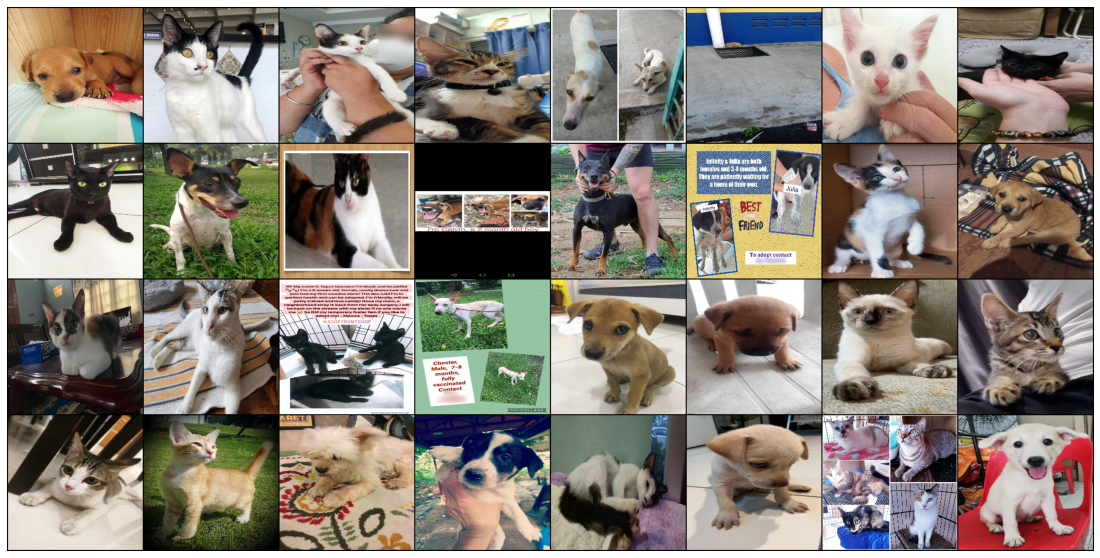

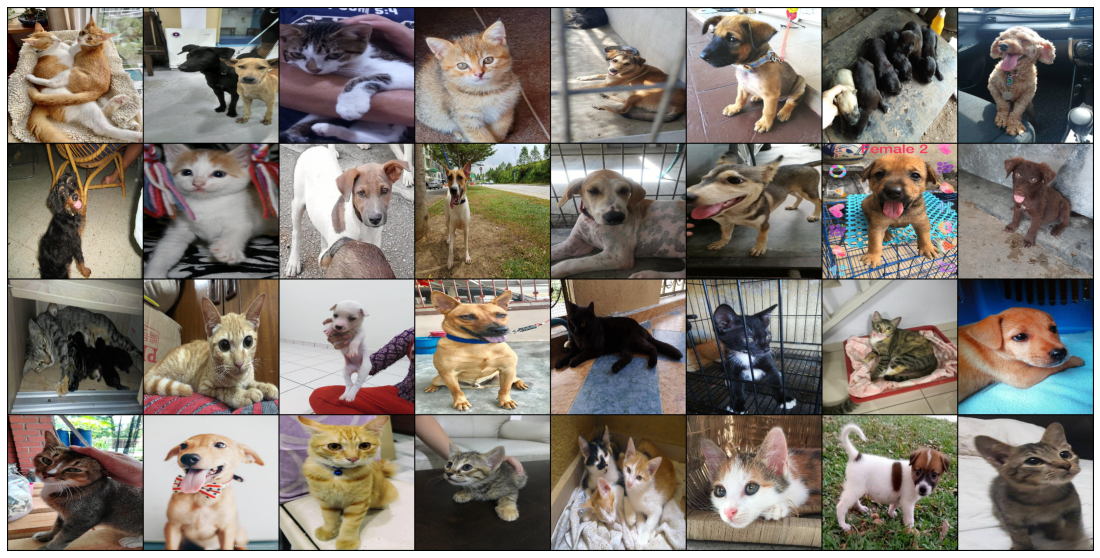

In [7]:
plot_batches(dl, 3)